# Report

我選擇的資料集是 Online Shoppers Purchasing Intention Dataset

關於資料分析的部分請見 **資料分析與前處理** 這個段落

我的目標是預測`Revenue`是true或false，選擇的模型是RandomForestClassifier

一開始我將`OperatingSystems`, `Browser`, `Region`, `TrafficType`, `Weekend`, `SpecialDay`, `Administrative`, `Administrative_Duration`, `Informational`, `Informational_Duration`, `ProductRelated`, `ProductRelated_Duration`, `BounceRates`, `ExitRates`這些數值資料沒有做任何處理直接丟進模型裡跑，average train accuracy = 1.000, average valid accuracy = 0.844

> 這個很明顯overfitting了

這時候我還沒調哦型的參數，因此我將RandomForestClassifier的max_depth設定為9，得到結果是average train accuracy = 0.858, average valid accuracy = 0.845。

> 看起來有比較好了，但這個資料集的`Revenue`大部分都是false，因此測試的結果是跟全部猜false差不多的

接下來我就把資料做一些前處理(詳見 **資料分析與前處理** 這個段落)，並且把每一項全部丟進去模型中跑，得到結果average train accuracy = 0.946, average valid accuracy = 0.899

> 有比之前更進步了

然後我試著不要將所有項目全部放入模型，挑選了`ProductRelated`, `ProductRelated_Duration`, `PageValues`, `BounceRates`, `ExitRates`, `SpecialDay`, `Month`, `visitor`, `Weekend`放入模型，最後得到average train accuracy = 0.935, average valid accuracy = 0.901

> 雖然準確度沒有上升，但的確比之前高了

最後我微調了一些模型參數: n_estimators = 120, min_samples_split = 5，得到
average train accuracy = 0.931, average valid accuracy = 0.903

> 又比之前的準確度高一點點了




# 資料分析與前處理

## 讀入資料

In [0]:
import numpy as np
import pandas as pd

df = pd.read_csv('online_shoppers_intention.csv')
print(df.isnull().sum())
df.head()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


將training data set，可以看見每個欄位的資料都是完整的，不用填補缺失值

## 相關性

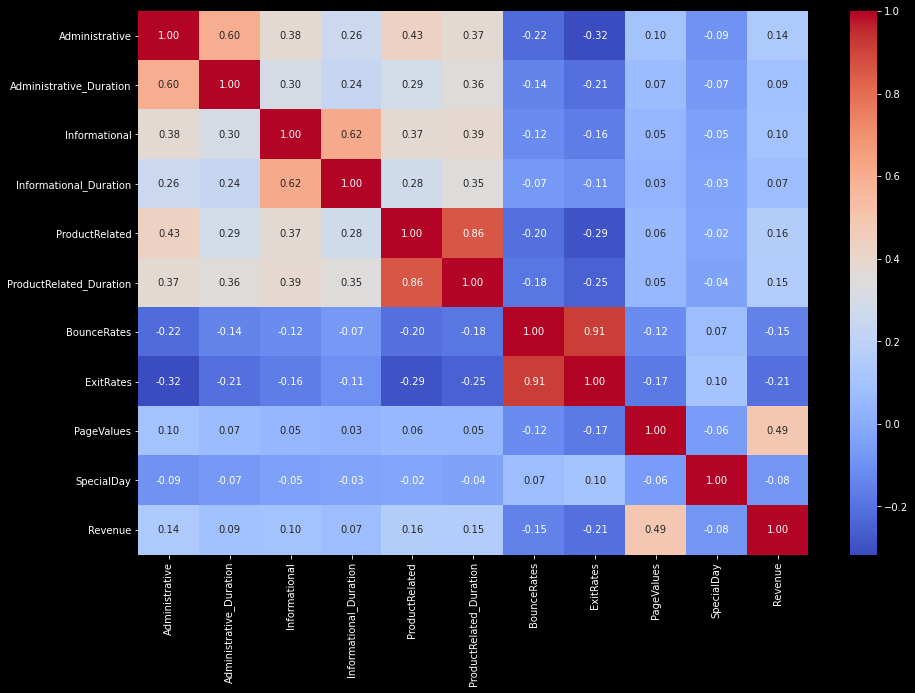

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(
    df[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay','Revenue']].corr(),
    annot=True,
    fmt = ".2f",
    cmap = "coolwarm",
    ax = ax
    )

我把各個數值資料之間的相關係數畫出來觀察


可以看出`PageValues`與最後要預測的`Revenue`相關度很高

## Administrative

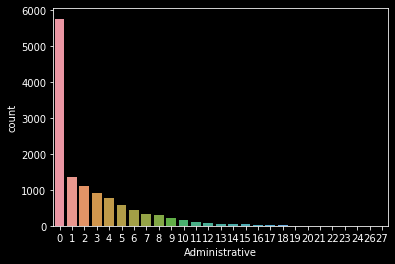

In [0]:
sns.countplot(x = 'Administrative', data = df)

`Administrative`大部分都集中在12之前，因次將大於12的都歸為一組



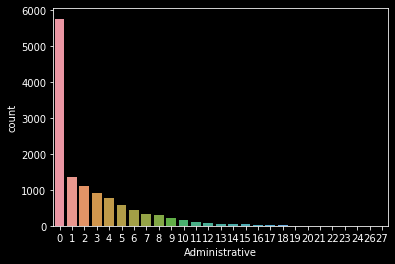

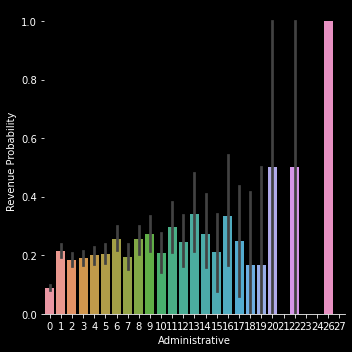

In [0]:
g = sns.countplot(x = 'Administrative', data = df)

g = sns.catplot(x = 'Administrative', y ='Revenue', data = df, kind = 'bar')
g.despine(left=True)
g = g.set_ylabels('Revenue Probability')

## Administrative Duration

(array([5.789e+03, 4.510e+02, 1.080e+02, 3.700e+01, 2.700e+01, 6.000e+00,
        4.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([1.33333333e+00, 3.41075000e+02, 6.80816667e+02, 1.02055833e+03,
        1.36030000e+03, 1.70004167e+03, 2.03978333e+03, 2.37952500e+03,
        2.71926667e+03, 3.05900833e+03, 3.39875000e+03]),
 <a list of 10 Patch objects>)

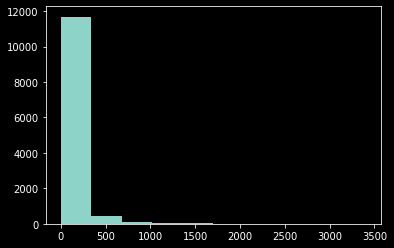

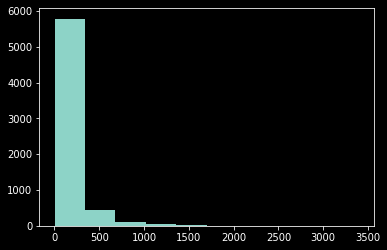

In [0]:
plt.figure(1)
plt.hist(df['Administrative_Duration'])

plt.figure(2)
plt.hist(df.loc[ df['Administrative_Duration'] > 0, 'Administrative_Duration'])

`Administrative Duration`大部分的值為0，且分布非常偏頗，因此取log做處理

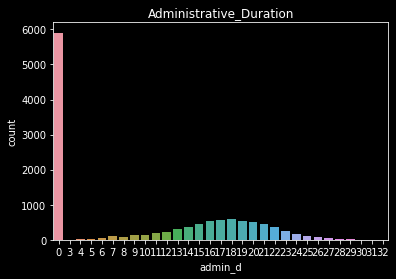

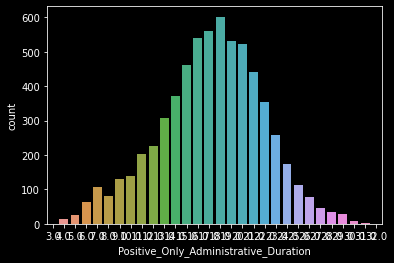

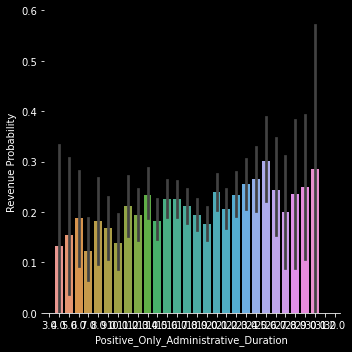

In [0]:
df['admin_d'] = (np.log(df['Administrative_Duration'] + 1) * 4).astype(int)
g = sns.countplot(x = 'admin_d', data = df)

df['Positive_Only_Administrative_Duration'] = df.loc[ df['admin_d'] > 0, 'admin_d']

plt.figure(1)
g = sns.countplot(x = 'admin_d', data = df).set_title('Administrative_Duration')

plt.figure(2)
g = sns.countplot(x = 'Positive_Only_Administrative_Duration', data = df)

g = sns.catplot(x = 'Positive_Only_Administrative_Duration', y ='Revenue', data = df, kind = 'bar')
g.despine(left=True)
g = g.set_ylabels('Revenue Probability')

因為很多`Administrative Duration`的值都為0，因此在取log前先將所有數值加1，讓所有`Administrative Duration`再取完log後都大於等於0





## Informational

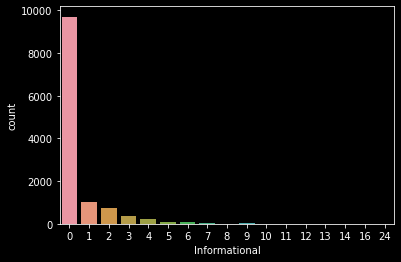

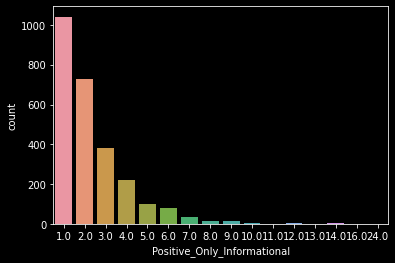

In [0]:
df['Positive_Only_Informational'] = df.loc[ df['Informational'] > 0, 'Informational']

plt.figure(1)
g = sns.countplot(x = 'Informational', data = df)

plt.figure(2)
g = sns.countplot(x = 'Positive_Only_Informational', data = df)

`Informational`絕大部分都是0

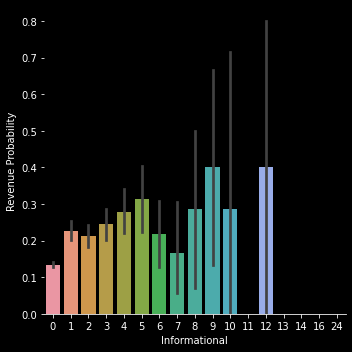

In [0]:
g = sns.catplot(x = 'Informational', y ='Revenue', data = df, kind = 'bar')
g.despine(left=True)
g = g.set_ylabels('Revenue Probability')

## Informational_Duration

(array([1.936e+03, 2.740e+02, 8.400e+01, 5.200e+01, 2.600e+01, 1.600e+01,
        9.000e+00, 2.000e+00, 5.000e+00, 1.000e+00]),
 array([1.0000000e+00, 2.5583750e+02, 5.1067500e+02, 7.6551250e+02,
        1.0203500e+03, 1.2751875e+03, 1.5300250e+03, 1.7848625e+03,
        2.0397000e+03, 2.2945375e+03, 2.5493750e+03]),
 <a list of 10 Patch objects>)

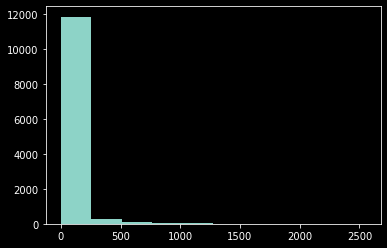

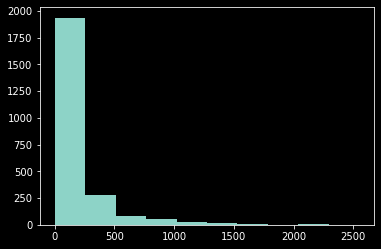

In [0]:
plt.figure(1)
plt.hist(df['Informational_Duration'])

plt.figure(2)
plt.hist(df.loc[ df['Informational_Duration'] > 0, 'Informational_Duration'])

`informational Duration`大部分的值為0，且分布非常偏頗，因此取log做處理

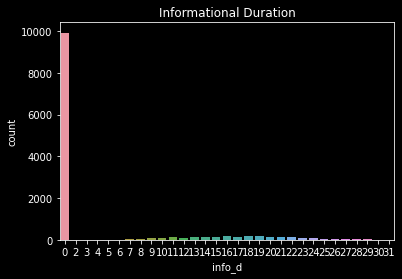

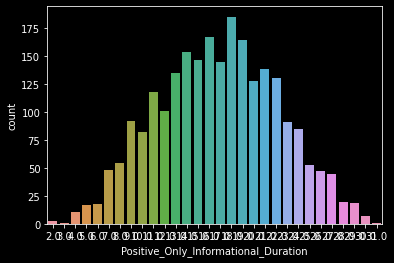

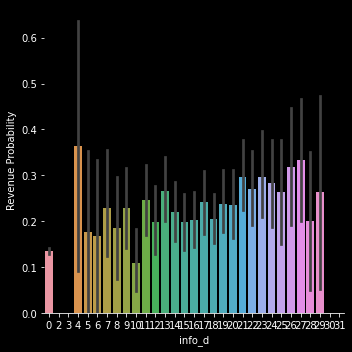

In [0]:
df['info_d'] = (np.log(df['Informational_Duration'] + 1) * 4).astype(int)
df['Positive_Only_Informational_Duration'] = df.loc[ df['info_d'] > 0, 'info_d']

plt.figure(1)
g = sns.countplot(x = 'info_d', data = df).set_title('Informational Duration')

plt.figure(2)
g = sns.countplot(x = 'Positive_Only_Informational_Duration', data = df)

g = sns.catplot(x = 'info_d', y ='Revenue', data = df, kind = 'bar')
g.despine(left=True)
g = g.set_ylabels('Revenue Probability')

因為很多`Informational Duration`的值都為0，因此在取log前先將所有數值加1，讓所有`Informational Duration`再取完log後都大於等於0

## ProductRelated

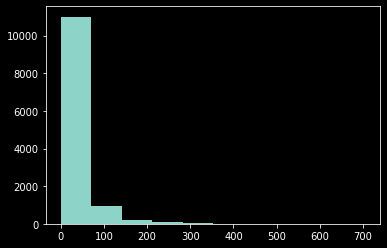

<Figure size 432x288 with 0 Axes>

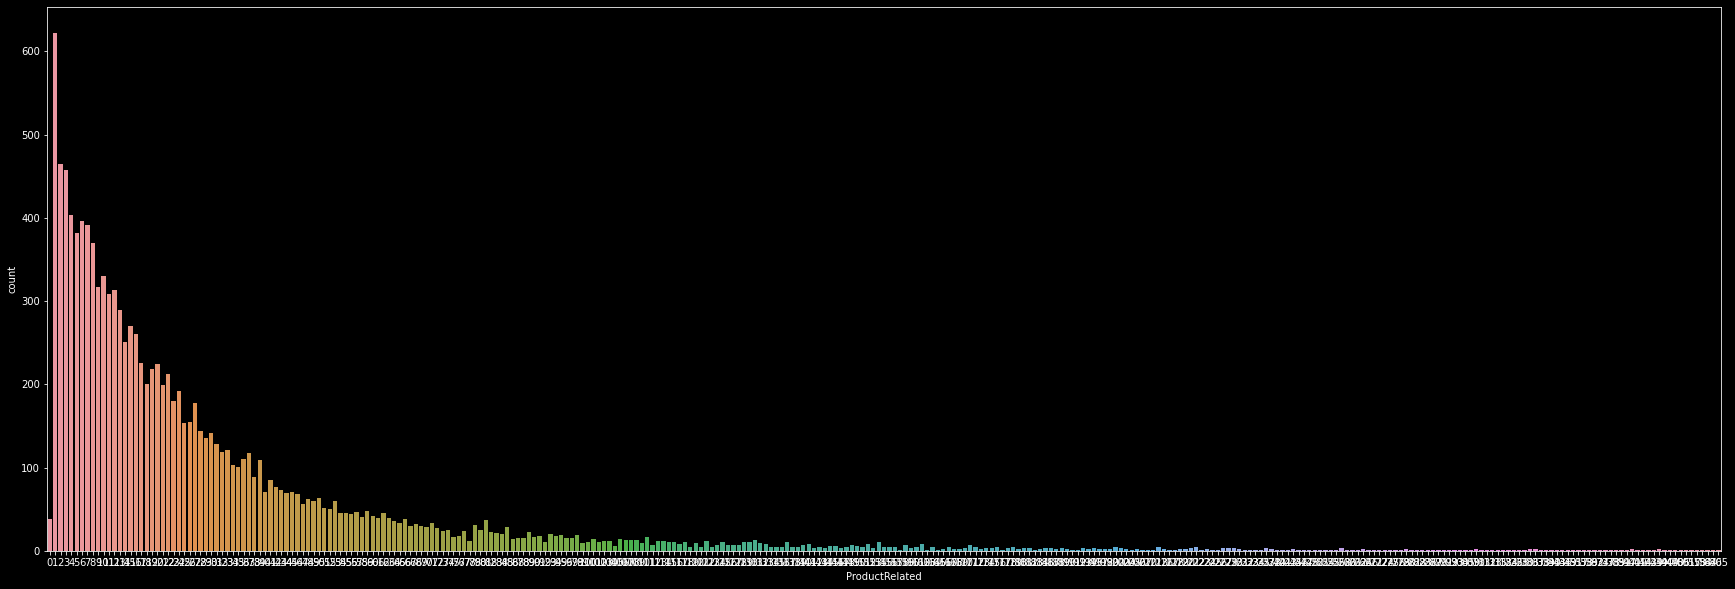

In [0]:
plt.figure(1)
plt.hist(df['ProductRelated'])

plt.figure(2)
fig, ax = plt.subplots(figsize = (30, 10))
sns.countplot(x = 'ProductRelated', data = df, ax = ax)

可以看出`ProductRelated`的分佈大部分集中在值較小的地方，因此取log做處理



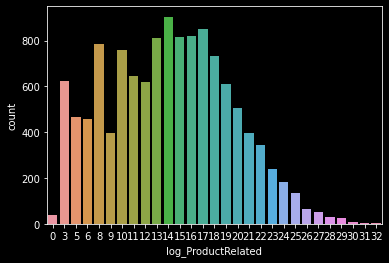

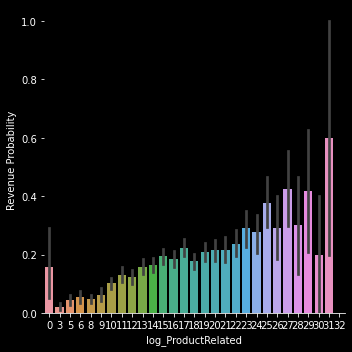

In [0]:
df['log_ProductRelated'] = (np.log(df['ProductRelated'] + 1) * 5).astype(int)

g = sns.countplot(x = 'log_ProductRelated', data = df)

g = sns.catplot(x = 'log_ProductRelated', y ='Revenue', data = df, kind = 'bar')
g.despine(left=True)
g = g.set_ylabels('Revenue Probability')

看得出些許`ProductRelated`越高，`Revenue`機率越低的趨勢

## ProductRelated Duration

(array([1.1305e+04, 2.3400e+02, 2.6000e+01, 6.0000e+00, 2.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([5.00000000e-01, 6.39780222e+03, 1.27951044e+04, 1.91924067e+04,
        2.55897089e+04, 3.19870111e+04, 3.83843133e+04, 4.47816156e+04,
        5.11789178e+04, 5.75762200e+04, 6.39735222e+04]),
 <a list of 10 Patch objects>)

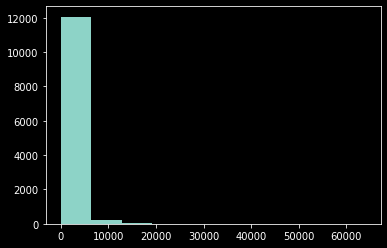

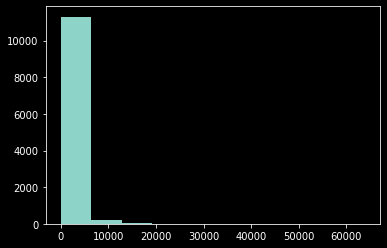

In [0]:
plt.figure(1)
plt.hist(df['ProductRelated_Duration'])

plt.figure(2)
plt.hist(df.loc[ df['ProductRelated_Duration'] > 0, 'ProductRelated_Duration'])

與前面不同，`ProductRelated_Duration`大部分的值都大於0，不過資料一樣相當偏頗，因此取log做處理

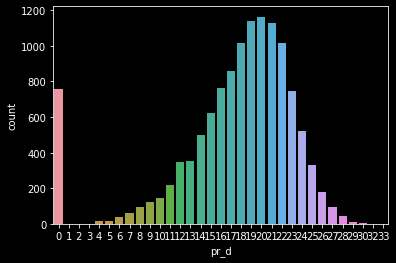

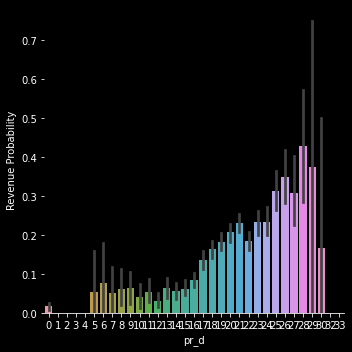

In [0]:
df['pr_d'] = (np.log(df['ProductRelated_Duration'] + 1) * 3).astype(int)

g = sns.countplot(x = 'pr_d', data = df)

g = sns.catplot(x = 'pr_d', y ='Revenue', data = df, kind = 'bar')
g.despine(left=True)
g = g.set_ylabels('Revenue Probability')

看得出些許`ProductRelated_Duration`越高，`Revenue`機率越低的趨勢

## BounceRates

0.2


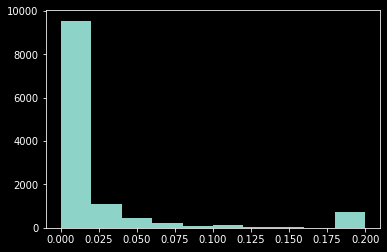

In [0]:
plt.hist(df['BounceRates'])
print(max(df['BounceRates']))

`BounceRates`分布在0 ~ 0.2之間，大部分集中在0

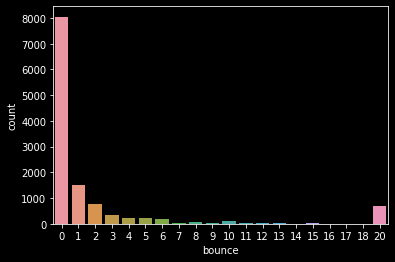

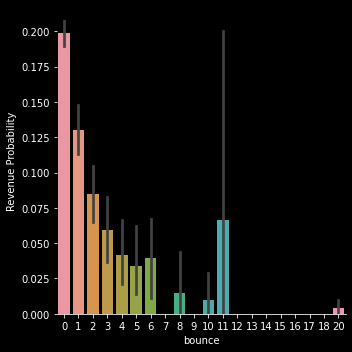

In [0]:
df['bounce'] = (df['BounceRates'] * 100).astype(int)

g = sns.countplot(x = 'bounce', data = df)

g = sns.catplot(x = 'bounce', y ='Revenue', data = df, kind = 'bar')
g.despine(left=True)
g = g.set_ylabels('Revenue Probability')

將`BounceRates`重新map到0 ~ 20間的整數上


## ExitRates

0.2


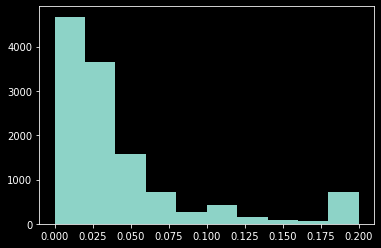

In [0]:
plt.hist(df['ExitRates'])
print(max(df['ExitRates']))

`ExitRates`分布在0 ~ 0.2之間，大部分集中在0

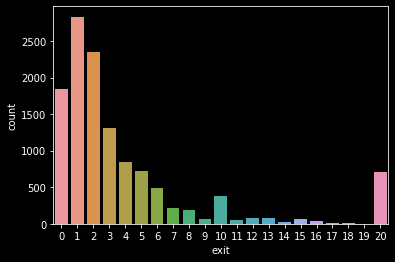

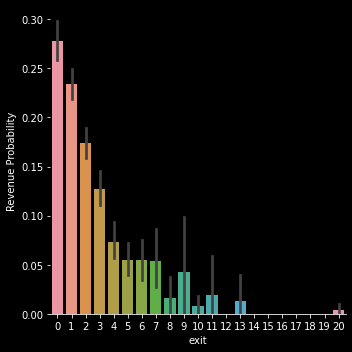

In [0]:
df['exit'] = (df['ExitRates'] * 100).astype(int)

g = sns.countplot(x = 'exit', data = df)

g = sns.catplot(x = 'exit', y ='Revenue', data = df, kind = 'bar')
g.despine(left=True)
g = g.set_ylabels('Revenue Probability')

將`ExitRates`重新map到0 ~ 20間的整數上

看得出有`ExitRates`越高，`Revenue`機率越低的趨勢


## PageValues

361.76374189999996


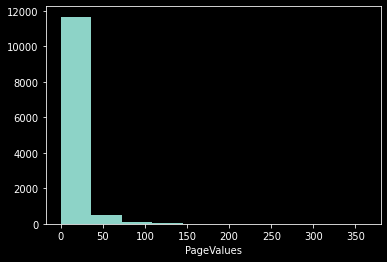

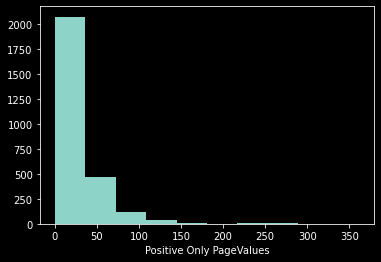

In [0]:
plt.figure(1)
plt.xlabel('PageValues')
plt.hist(df['PageValues'])

plt.figure(2)
plt.xlabel('Positive Only PageValues')
plt.hist(df.loc[ df['PageValues'] > 0, 'PageValues'])

print(max(df['PageValues']))

`PageValues`絕大部分都是0，大部分的值也是集中在0附近，因此取log來處理

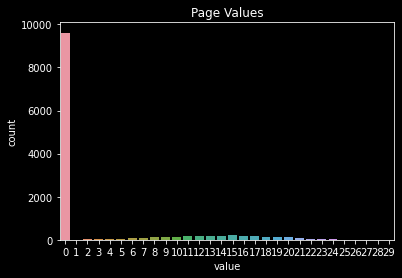

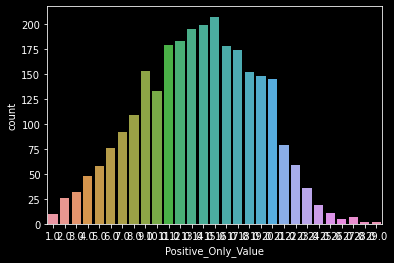

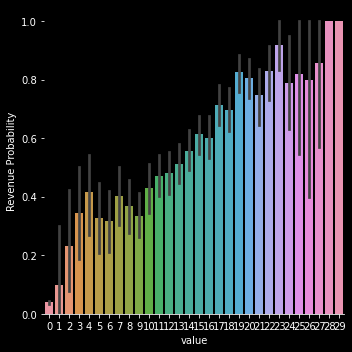

In [0]:
df['value'] = (np.log(df['PageValues'] + 1) * 5).astype(int)
df['Positive_Only_Value'] = df.loc[ df['value'] > 0, 'value']

plt.figure(1)
g = sns.countplot(x = 'value', data = df).set_title('Page Values')

plt.figure(2)
g = sns.countplot(x = 'Positive_Only_Value', data = df)

g = sns.catplot(x = 'value', y ='Revenue', data = df, kind = 'bar')
g.despine(left=True)
g = g.set_ylabels('Revenue Probability')

做log完之後，可以明顯看見有`PageValues`越高，`Revenue`機率越高的趨勢

## SpecialDay

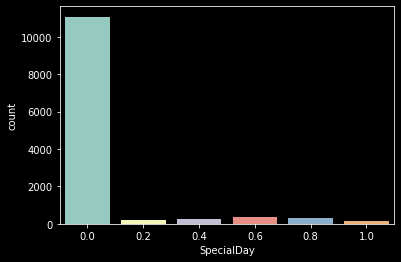

In [0]:
g = sns.countplot(x = 'SpecialDay', data = df)

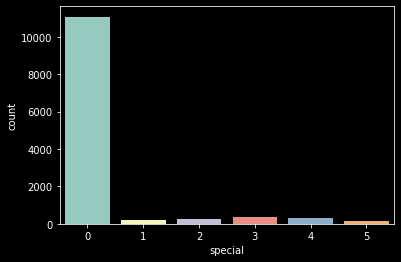

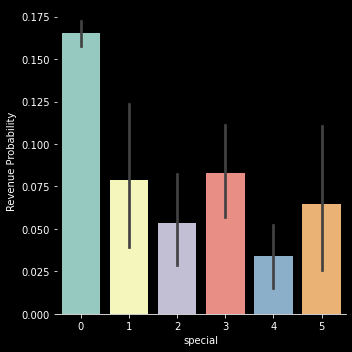

In [0]:
df['special'] = (df['SpecialDay'] * 5).astype(int)

g = sns.countplot(x = 'special', data = df)

g = sns.catplot(x = 'special', y ='Revenue', data = df, kind = 'bar')
g.despine(left=True)
g = g.set_ylabels('Revenue Probability')

將`SpecialDay`重0 ~ 1map到0 ~ 5間的整數上

## Month

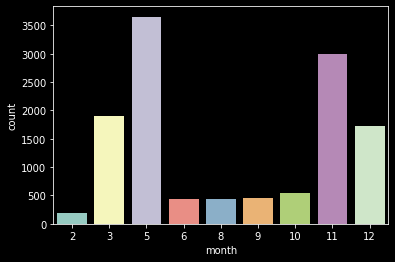

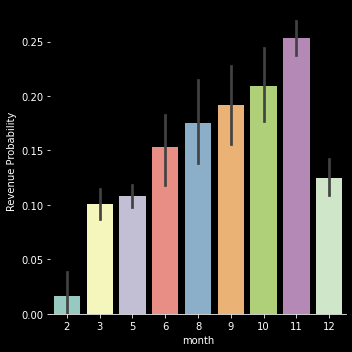

In [0]:
month = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'June':5, 'Jul':6, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
df['month'] = df['Month'].map(month).astype(int)

g = sns.countplot(x = 'month', data = df)

g = sns.catplot(x = 'month', y ='Revenue', data = df, kind = 'bar')
g.despine(left=True)
g = g.set_ylabels('Revenue Probability')

這個資料似乎缺少一月、四月和七月；能看到越接近年末，`Revenue`的機率似乎越高

## OperatingSystems

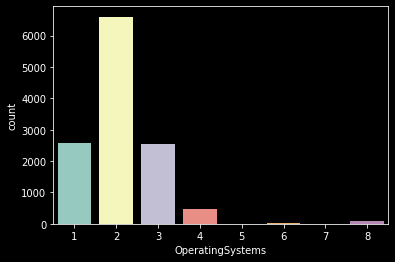

In [0]:
g = sns.countplot(x = 'OperatingSystems', data = df)

大部分的`OperatingSystems`都集中在1, 2, 3，因此把剩下的都歸類為4(其他)

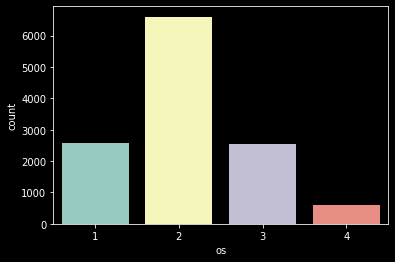

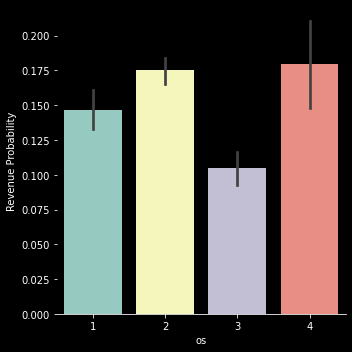

In [0]:
df['os'] = df['OperatingSystems']
df.loc[ df['os'] > 4, 'os'] = 4

g = sns.countplot(x = 'os', data = df)

g = sns.catplot(x = 'os', y ='Revenue', data = df, kind = 'bar')
g.despine(left=True)
g = g.set_ylabels('Revenue Probability')

## Browser

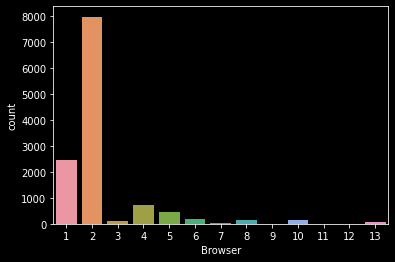

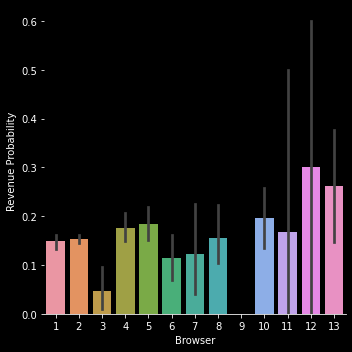

In [0]:
g = sns.countplot(x = 'Browser', data = df)

g = sns.catplot(x = 'Browser', y ='Revenue', data = df, kind = 'bar')
g.despine(left=True)
g = g.set_ylabels('Revenue Probability')

## Region

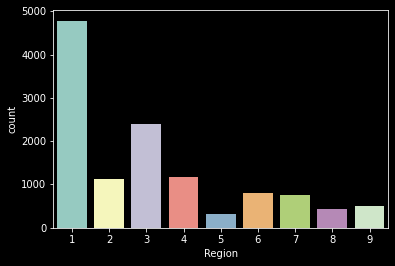

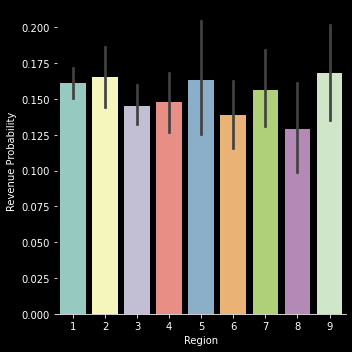

In [0]:
g = sns.countplot(x = 'Region', data = df)

g = sns.catplot(x = 'Region', y ='Revenue', data = df, kind = 'bar')
g.despine(left=True)
g = g.set_ylabels('Revenue Probability')

`OperatingSystems`, `Browser`, `Region` 與`Revenue`似乎都沒有太大的關聯

## TrafficType

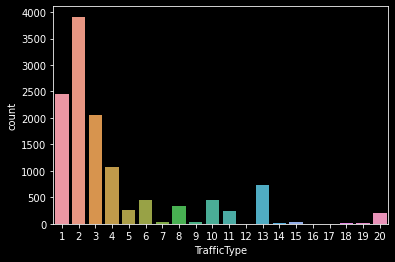

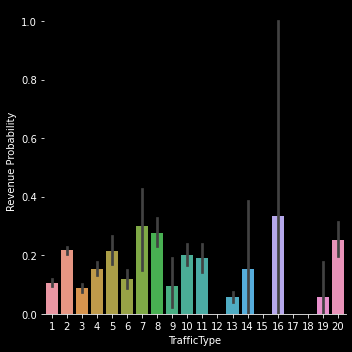

In [0]:
g = sns.countplot(x = 'TrafficType', data = df)

g = sns.catplot(x = 'TrafficType', y ='Revenue', data = df, kind = 'bar')
g.despine(left=True)
g = g.set_ylabels('Revenue Probability')

`TrafficType`的資料數量相差很大，不是很好判斷關聯度

## VisitorType

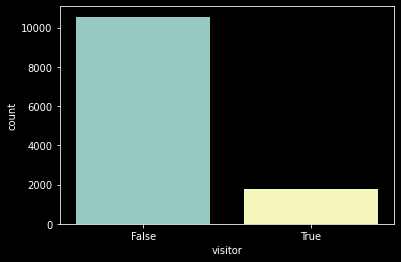

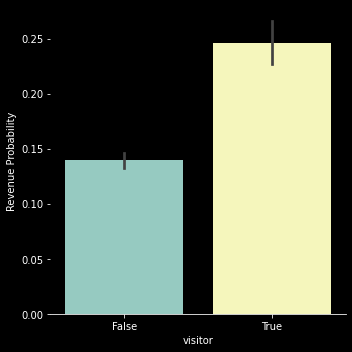

In [0]:
df['visitor'] = df['VisitorType'].map( {'Returning_Visitor': 0, 'New_Visitor': 1} ).astype(bool)

g = sns.countplot(x = 'visitor', data = df)

g = sns.catplot(x = 'visitor', y ='Revenue', data = df, kind = 'bar')
g.despine(left=True)
g = g.set_ylabels('Revenue Probability')

`VisitorType`分為兩種，分別是`Returning_Visitor`與`New_Visitor`； `New_Visitor`有較高的機率`Revenue`

# 訓練模型

In [0]:
from sklearn.model_selection import KFold             
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score            

train_x = df[['ProductRelated','pr_d','value','bounce','exit','special','month','visitor','Weekend']]
train_y = df['Revenue']

kf = KFold(n_splits=2,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍


train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤

    model = RandomForestClassifier(
        n_estimators = 120,
        random_state = 1012,
        max_depth = 9,
        min_samples_split = 5,
    )  

    model.fit(train_x_split, train_y_split)           
    
    train_pred_y = model.predict(train_x_split)       # 確認模型是否訓練成功
    train_acc = accuracy_score(train_y_split,         # 計算訓練資料準確度
                               train_pred_y)
    valid_pred_y = model.predict(valid_x_split)       # 驗證模型是否訓練成功
    valid_acc = accuracy_score(valid_y_split,         # 計算驗證資料準確度
                               valid_pred_y)
    
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)

print((
    'average train accuracy: {}\n' +
    '    min train accuracy: {}\n' +
    '    max train accuracy: {}\n' +
    'average valid accuracy: {}\n' +
    '    min valid accuracy: {}\n' +
    '    max valid accuracy: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
))

average train accuracy: 0.9307380373073804
    min train accuracy: 0.92992700729927
    max train accuracy: 0.9315490673154907
average valid accuracy: 0.9025141930251419
    min valid accuracy: 0.9004055150040552
    max valid accuracy: 0.9046228710462287


最後挑選放進模型的資料有ProductRelated, ProductRelated_Duration, PageValues, BounceRates, ExitRates, SpecialDay, Month, visitor, Weekend

使用的模型是RandomForestClassifier

模型的參數是n_estimators = 120, random_state = 1012, max_depth = 9,
min_samples_split = 5

最後得到average train accuracy = 0.9307380373073804, average valid accuracy = 0.9025141930251419

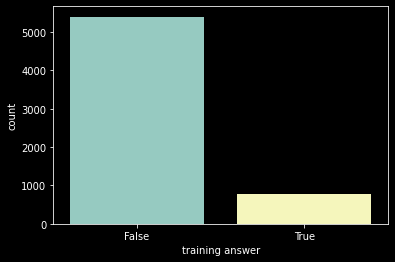

In [0]:
plt.xlabel('training answer')
g = sns.countplot(train_pred_y)

模型預測的分布，false和true的比例看起來還算合理